In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification

In [2]:
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器
from sklearn.ensemble import RandomForestClassifier

In [3]:
names=["Linear SVM","Decision Tree","Naive Bayes"]
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=2,max_depth=5),  #random_state为了可复现
    GaussianNB(),
]

In [4]:
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上架随机扰动，在x轴加噪音
linearly_separable=(X,y)#将上述得到的x，y够作为一个线性可分的数据集

datasets=[make_moons(noise=0.1,random_state=np.random.RandomState(2)),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]


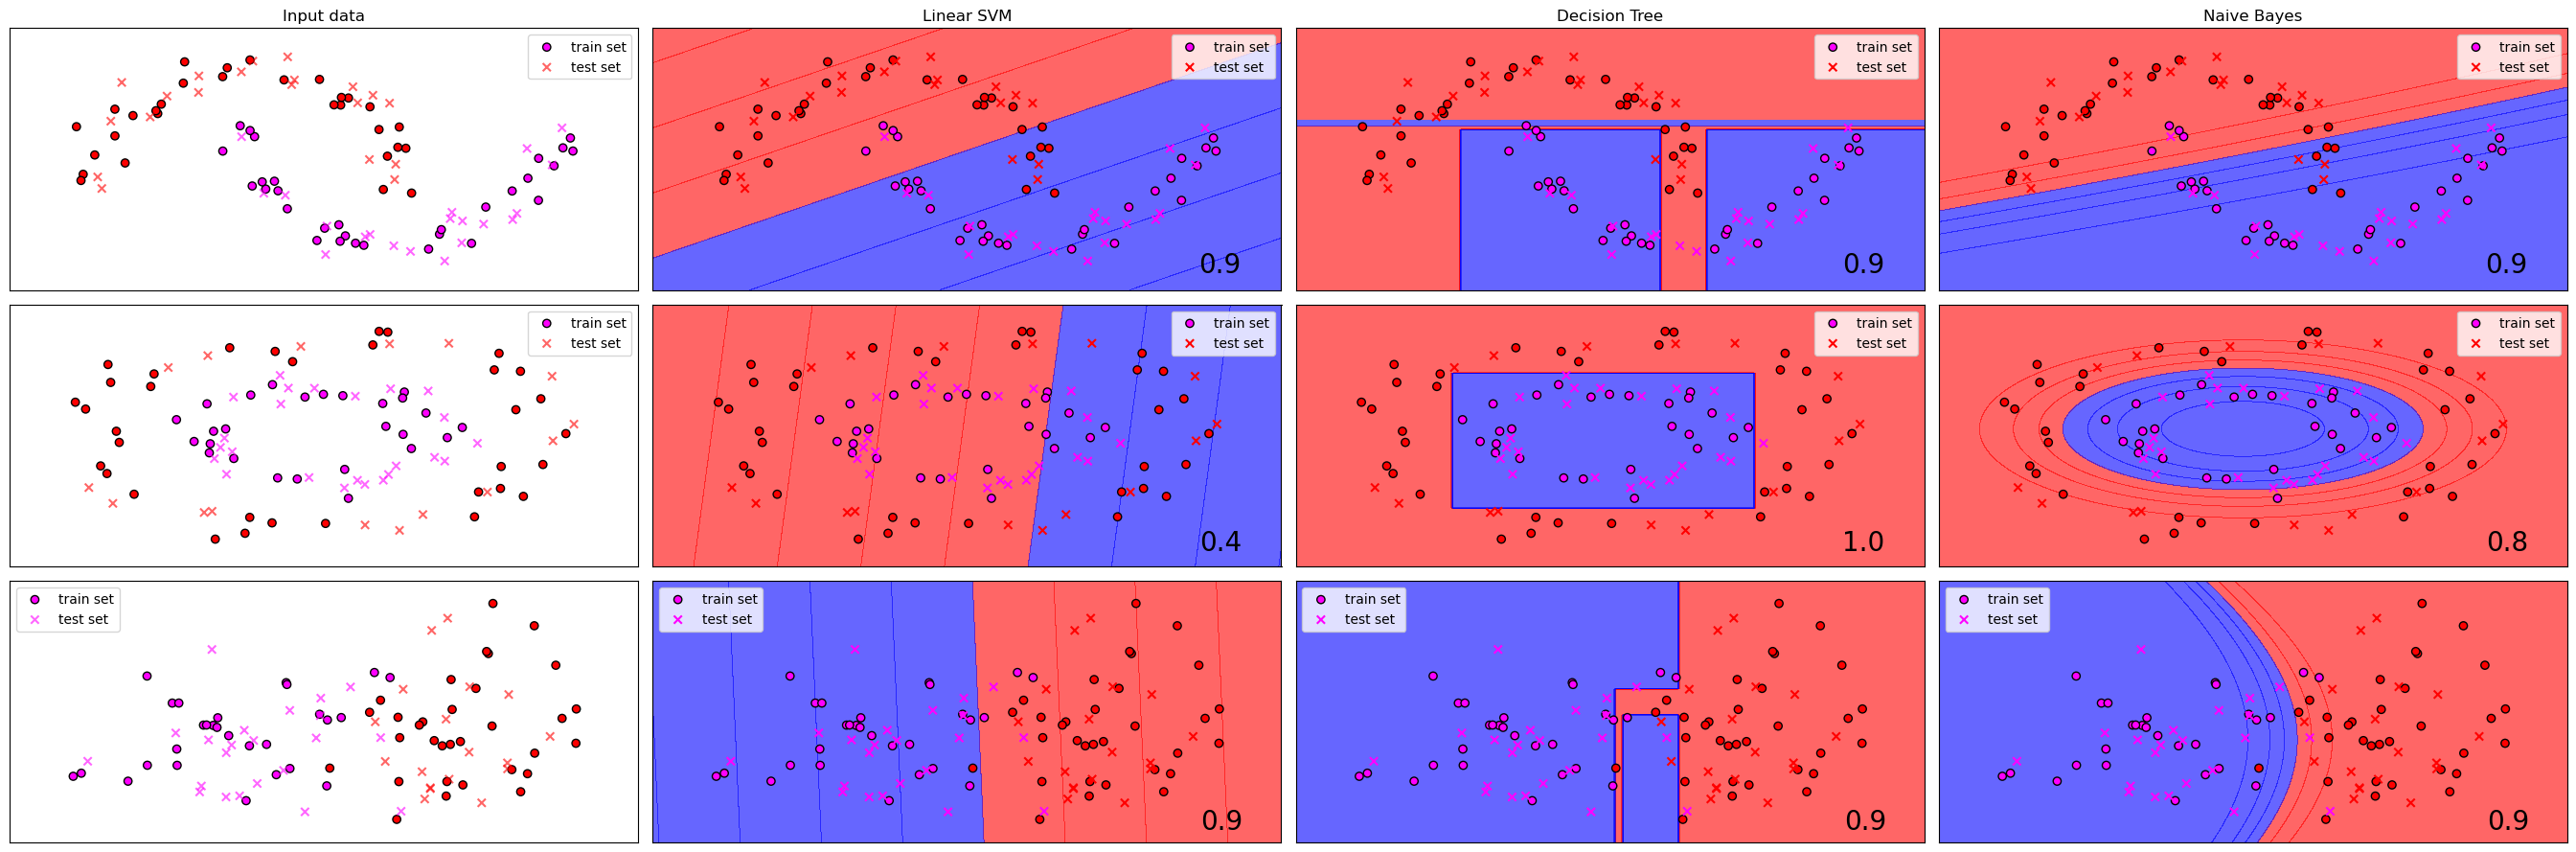

In [8]:
figure=plt.figure(figsize=(27,9))
i=1
for ds_cnt,ds in enumerate(datasets):
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    cm=ListedColormap((['red','blue']))
    cm_bright=ListedColormap(['#FF0000','#FF00FF'])
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               facecolor='k',marker='x',label='test set')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.legend()
    i+=1
    
    for name,clf in zip(names,classifiers):
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(X_train,y_train)
        score=clf.score(X_test,y_test)
        
        if hasattr (clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        Z=Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.6)
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   facecolor='k',marker='x',label='test set')
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend()
        if ds_cnt==0:
            ax.set_title(name)
        ax.text(xx.max()-.3,yy.min()+.3,('%.1f'% score), 
                size=20,horizontalalignment='right')
        i +=1

plt.tight_layout()
plt.show()